In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
#movies_df = pd.read_csv(r"D:\AI ML DL\recommendation system\ml-latest-small\movies.csv")
#ratings_df = pd.read_csv(r"D:\AI ML DL\recommendation system\ml-latest-small\ratings.csv")
#tags_df = pd.read_csv(r"D:\AI ML DL\recommendation system\ml-latest-small\tags.csv")
#links_df = pd.read_csv(r"D:\AI ML DL\recommendation system\ml-latest-small\links.csv")

In [32]:
column_names = ['user_id','item_id','ratings','timestamp']
df = pd.read_csv(r"D:\AI ML DL\recommendation system\Movie-Recommender-in-python\u.data", sep='\t',names=column_names)


In [33]:
df.head()

,user_id,item_id,ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [34]:
Movies_df= pd.read_csv(r"D:\AI ML DL\recommendation system\Movie-Recommender-in-python\Movie_Id_Titles")
Movies_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [35]:
df = pd.merge(df,Movies_df,on='item_id')
df.head()

,user_id,item_id,ratings,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# plotting graphs 


#creating ratings dataframe with average rating and number of ratings:


In [36]:
df.groupby('title')['ratings'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: ratings, dtype: float64

In [37]:
 df.groupby('title')['ratings'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: ratings, dtype: int64

In [38]:
rating = pd.DataFrame(df.groupby('title')['ratings'].mean())
rating.head()

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


now set the number of ratings coloumns

rating['no.of ratings']=pd.Data

In [39]:
rating['no.of ratings']=pd.DataFrame(df.groupby('title')['ratings'].count())
rating.head()

,ratings,no.of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Plotting graph

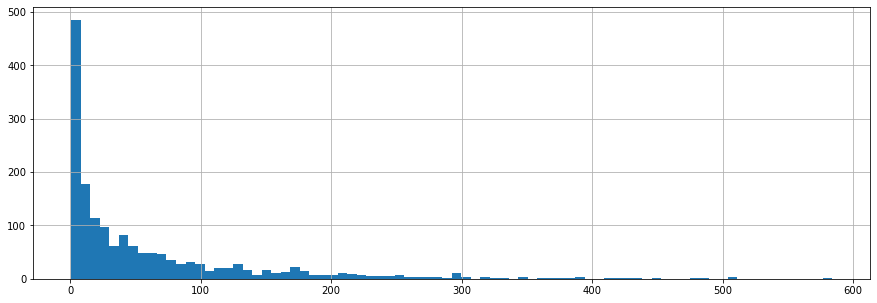

In [40]:
plt.figure(figsize=(15,5))
rating['no.of ratings'].hist(bins=80)
plt.show()

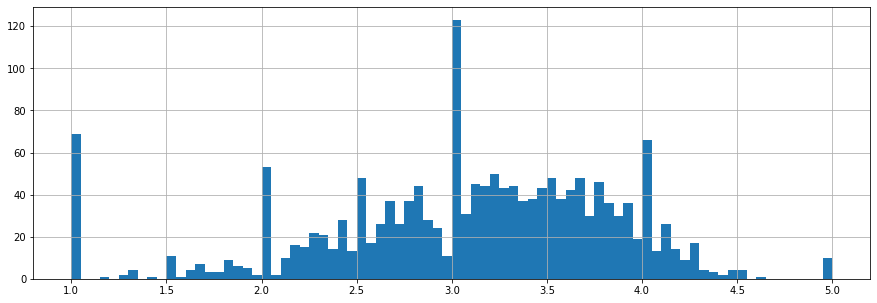

In [41]:
plt.figure(figsize=(15,5))
rating['ratings'].hist(bins=80)
plt.show()

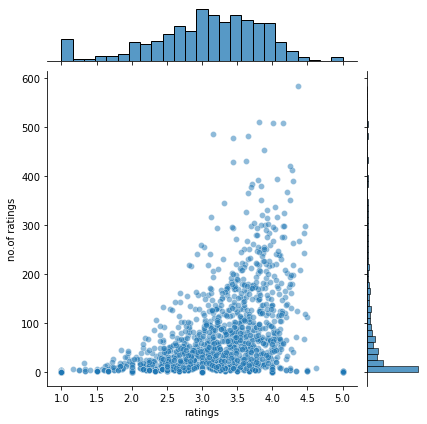

In [42]:
sns.jointplot(x='ratings',y='no.of ratings',data=rating,alpha=0.5)


Recommending similar movies

In [43]:
movienet = df.pivot_table(index='user_id',columns='title',values='ratings')
movienet.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
rating.sort_values('no.of ratings',ascending=False).head(10)

,ratings,no.of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


finding correlation

In [45]:
starwars_user_ratings=movienet['Star Wars (1977)']
starwars_user_ratings.head(10)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

In [46]:
similar_to_starwars=movienet.corrwith(starwars_user_ratings)

C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [47]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [48]:
corr_starwars.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


In [49]:
corr_starwars =corr_starwars.join(rating['no.of ratings'])
corr_starwars.head()


,Correlation,no.of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [50]:
corr_starwars[corr_starwars['no.of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no.of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [53]:
dalmatians_user_ratings=movienet['101 Dalmatians (1996)']
dalmatians_user_ratings.head()

user_id
0    NaN
1    2.0
2    NaN
3    NaN
4    NaN
Name: 101 Dalmatians (1996), dtype: float64

In [54]:
similar_to_dalmatians=movienet.corrwith(dalmatians_user_ratings)

C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [55]:
corr_dalmatians =pd.DataFrame(similar_to_dalmatians,columns=['Correlation'])
corr_dalmatians.dropna(inplace=True)
corr_dalmatians.head()

,Correlation
title,
'Til There Was You (1997),-1.000000
101 Dalmatians (1996),1.000000
12 Angry Men (1957),-0.049890
187 (1997),0.269191
2 Days in the Valley (1996),0.048973


In [56]:
corr_dalmatians.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Hard Rain (1998),1.0
"Winter Guest, The (1997)",1.0
Fatal Instinct (1993),1.0
Faithful (1996),1.0
Trial by Jury (1994),1.0


In [58]:
corr_dalmatians=corr_dalmatians.join(rating['no.of ratings'])
corr_dalmatians.head()

,Correlation,no.of ratings
title,,
'Til There Was You (1997),-1.000000,9
101 Dalmatians (1996),1.000000,109
12 Angry Men (1957),-0.049890,125
187 (1997),0.269191,41
2 Days in the Valley (1996),0.048973,93


In [59]:
corr_dalmatians[corr_dalmatians['no.of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no.of ratings
title,,
101 Dalmatians (1996),1.000000,109
Murder at 1600 (1997),0.663965,218
Miracle on 34th Street (1994),0.609938,101
Being There (1979),0.530438,116
"Remains of the Day, The (1993)",0.514223,150
